In [ ]:
!pip install langchain_community
!pip install replicate
!pip install langchain_community replicate

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

In [ ]:
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
    model=model,
    model_kwargs={"temperature": 0.7, "max_tokens": 512},
    replicate_api_token=api_token,
)

In [ ]:
import pandas as pd

# Upload file CSV
from google.colab import files
uploaded = files.upload()

# Muat dataset
df = pd.read_csv("googleplaystore_user_reviews.csv")

# Ambil 1550 baris data pertama
subset_df = df.head(1550)

# Ambil kolom ulasan
reviews = subset_df["Translated_Review"].dropna().tolist()

Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv


In [ ]:
prompt_template = """
Classify these reviews as Positive, Negative, or Mixed.
Also identify relevant focus areas such as UI/UX, performance, bugs, or features.
Use this format:
- Sentiment: [Sentiment]
- Categories: [Categories]

Reviews:
{reviews_text}
"""

In [ ]:
refined_prompt = """
Step 1: Classify the sentiment of each review as Positive, Negative, or Mixed.
Step 2: Identify relevant categories like UI/UX, performance, bugs, or features.
Step 3: Provide a one-sentence summary of the review.

Reviews:
{reviews_text}
"""

In [ ]:
parameters = {
    "top_k": 10,
    "top_p": 0.9,
    "max_tokens": 50,
    "repetition_penalty": 1.5,
    "stopping_sequence": "\n"
}

In [ ]:
batch_size = 50
all_results = []

for i in range(0, len(reviews), batch_size):
    batch_reviews = reviews[i:i+batch_size]
    reviews_text = "\n".join([f"Review {j+1}: {rev}" for j, rev in enumerate(batch_reviews)])

    final_prompt = refined_prompt.format(reviews_text=reviews_text)

    try:
        response = output.invoke(final_prompt, parameters=parameters)
        all_results.append(response)
        print(f"Processed batch {i//batch_size + 1}")
    except Exception as e:
        print(f"Error on batch {i//batch_size + 1}: {e}")

Processed batch 1
Processed batch 2
Processed batch 3
Processed batch 4
Processed batch 5
Processed batch 6
Processed batch 7
Processed batch 8
Processed batch 9
Processed batch 10
Processed batch 11
Processed batch 12
Processed batch 13
Processed batch 14
Processed batch 15
Processed batch 16
Processed batch 17
Processed batch 18
Processed batch 19
Processed batch 20
Processed batch 21


In [ ]:
import pandas as pd

results_df = pd.DataFrame(all_results, columns=["AI_Response"])
results_df.to_csv("sentiment_analysis_results.csv", index=False)
files.download("sentiment_analysis_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-4ebfef88f096>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments, y=counts, palette="viridis")


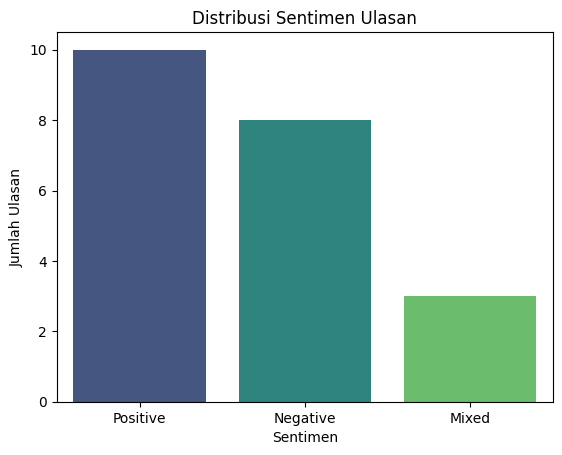

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiments = ['Positive', 'Negative', 'Mixed']
counts = [10, 8, 3]

sns.barplot(x=sentiments, y=counts, palette="viridis")
plt.title("Distribusi Sentimen Ulasan")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()

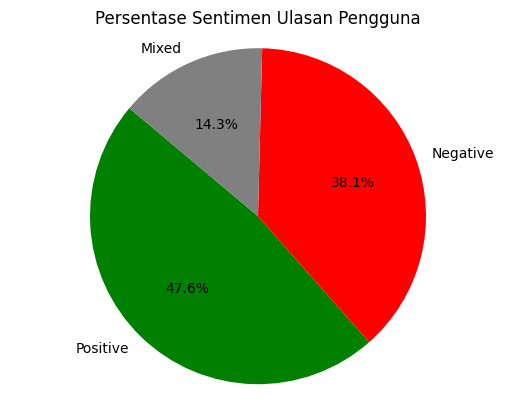

In [ ]:
import matplotlib.pyplot as plt

labels = sentiments
sizes = counts
colors = ['green', 'red', 'gray']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Persentase Sentimen Ulasan Pengguna")
plt.axis('equal')
plt.show()

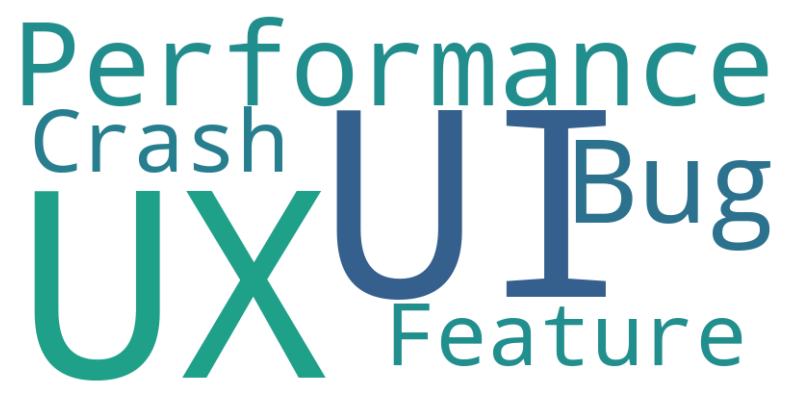

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "UI/UX Performance Bug Feature UI/UX Crash UI/UX Performance UI/UX Bug"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()